# **Decision Trees**
Decision Trees, are versatile learning machines used for classification and regression tasks, even multioutput tasks. Decision trees also form the fundamental components of random forests.

## **Training and Visualizing a Decision Tree**


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris = iris.target

tree_clf =DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

To visualize the tree we can use export_graphviz()

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,out_file="iris_tree.dot",feature_names=["petal length (cm)","peal width (cm)"],class_names=iris.target_names,rounded=True,filled=True)

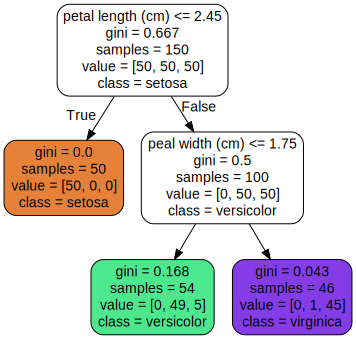

In [3]:
from graphviz import Source

Source.from_file("iris_tree.dot")

Decision trees require little data preparation, they don't require feature scaling or centerng at all

Decision trees work as multiple questions, at each node a question is asked and based on the answer we go further down the tree till we reach the class, Scikit-learn uses the CART algorithm so it produces only binary trees, i.e. whenever tree splits it splits into two nodes one representing the condition holds true or false

above gini stands for Gini impurity, which is the measure of how pure(gini=0) the node is, if all training instances belong to one class it is 0.

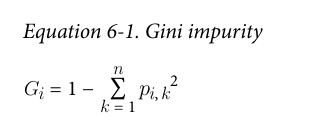

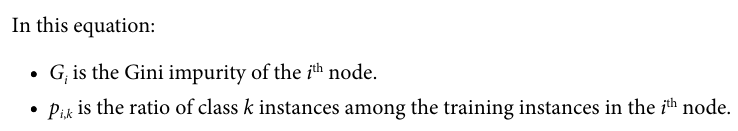

decision trees also have the method predict_proba()

In [4]:
print(tree_clf.predict_proba([[5.5,1.5]]).round(3))
print(tree_clf.predict([[5.5,1.5]]))

[[0.    0.907 0.093]]
[1]


## **CART Training Algorithm**
The algorithm works by splitting the training set into two using feature k and threshold tk. It searches for the pair (k,tk) that produces the purest subsets, weighted by their size.

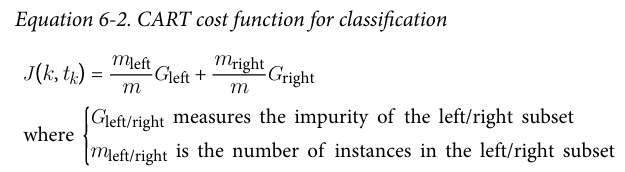

this process continues iteratively till we reach the max_depth or the gini impurity measure doesn't improve. There are few other hyperparameters that can control its stopping min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_leaf_nodes

CART algorithm is a greedy algorithm, it greedily searches for the optimal split at the top level, then repeats the process at each subsequent level without caring what will happen in the future splits therefore not garaunteed to give the optimal solution.

Other than Gini impurity there is another measure known as entropy(a set's entropy is zero when it contains instances of only one class)

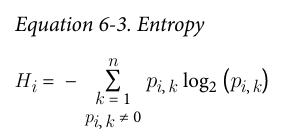

Key Differences:
- Computation: Gini impurity is generally faster to compute than entropy because it doesn’t require calculating logarithms.
- Interpretation: Entropy gives more insight into the uncertainty in the data, while Gini impurity focuses more on the likelihood of misclassification.
- Performance: In practice, the difference in model performance between Gini impurity and entropy is often negligible. Both metrics will often lead to similar trees and similar predictions.

When to Choose Gini Impurity or Entropy?

Use Gini Impurity when:
1) You want faster training times and computational efficiency.
2) You prefer simplicity and ease of implementation (since it’s computationally lighter).
3) You have a large dataset and need faster tree construction.

Use Entropy when:
1) You are specifically interested in maximizing information gain or when you have a deep theoretical motivation to prefer entropy.
2) You need a more balanced approach to splitting the data, especially if you're dealing with multiple classes or want to measure the uncertainty in the node.

**Regularization Hyperparameters**

Unlike other models, decision trees make few assumptions about the training data. If left unconstrained it will fit very well to the training data -> overfitting. As we used the max_depth to control the depth of the decision tree.The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the decision tree:
 
 max_features
 - Maximum number of features that are evaluated for splitting at each node
 
 max_leaf_nodes
 - Maximum number of leaf nodes
 
 min_samples_split
 - Minimum number of samples a node must have before it can be split
 
 min_samples_leaf
 - Minimum number of samples a leaf node must have to be created
 
 min_weight_fraction_leaf
 - Same as min_samples_leaf but expressed as a fraction of the total number of weighted instances
 
 >Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.

In [5]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150,noise=0.2,random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [6]:
X_moons_test,y_moons_test = make_moons(n_samples=1000,noise=0.2,random_state=42)
print("Accuracy on training set: ",tree_clf1.score(X_moons,y_moons)," Accuracy on testing set: ",tree_clf1.score(X_moons_test,y_moons_test))
print("Accuracy on training set: ",tree_clf2.score(X_moons,y_moons)," Accuracy on testing set: ",tree_clf2.score(X_moons_test,y_moons_test))

Accuracy on training set:  1.0  Accuracy on testing set:  0.901
Accuracy on training set:  0.9466666666666667  Accuracy on testing set:  0.918


see how the accuracy of the unregulrized tree is 1 but 0.9 on test set, while for the regulrized tree it is 0.94 on training and 0.91 on testing
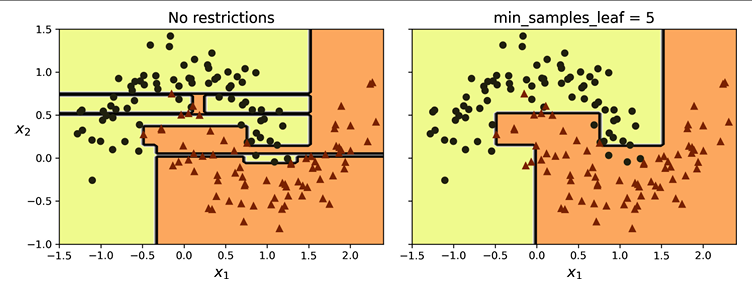

### Computational Complexity of Decision Tree Classifier

**Training Complexity:** O(n * m * log2(m))
  - n: Number of features
  - m: Number of samples
  - The algorithm evaluates each feature for every sample at each node, and sorting is required for feature splits at each node.


**Prediction Complexity:** O(log2(m))
  - m: Number of samples
  - Since decision trees are generally balanced, predicting a sample involves traversing a path from the root to a leaf, which is proportional to the depth of the tree, typically O(log2(m)).

#### Key Points:
- Training: More complex, as it requires checking all samples for each feature at each split.
- Prediction:Fast, as it only requires traversing the tree, which is logarithmic in depth relative to the number of samples in the training set.


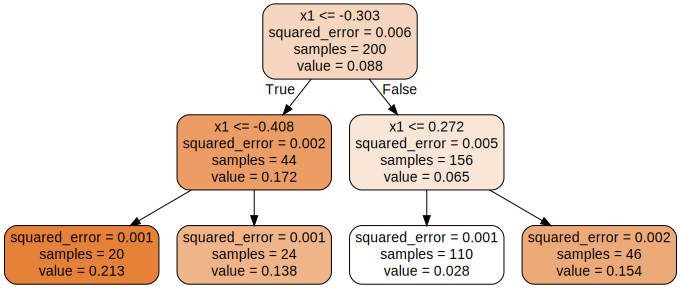

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X_quad = np.random.rand(200,1) - 0.5
y_quad = X_quad ** 2 +0.025*np.random.randn(200,1)
tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X_quad,y_quad)
export_graphviz(tree_reg,out_file="tree_reg.dot",feature_names=["x1"],filled=True,rounded=True)
Source.from_file("tree_reg.dot")

The prediction value is the average of the target value for instances in each region. The algorithm splits each region in a way that makes most training instances as close as possible to the predicted value.

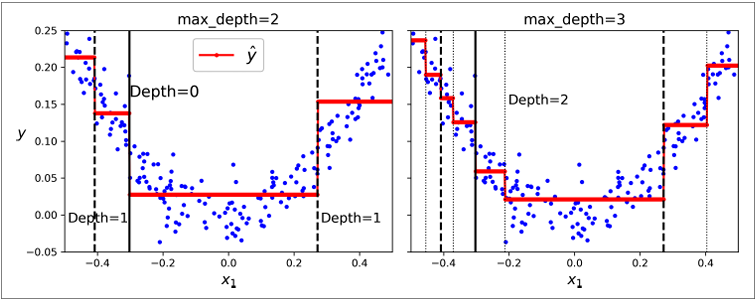

In the CART algorithm the cost function changes instead of trying to minimize the gini impurity it tries to minimize the MSE 

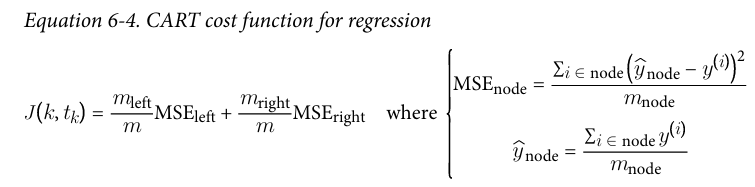

Similar to classification, decision tree regression is also prone to overfiting

## **Sensitivity to Asix Orientation**

Decision trees prefer orthogonal decision boundaries(splits are perpendicular to an axis),which makes them sensitive to data orientation.See the image below, the left image shows the linearly seperable dataset and how decision tree finds a decision boundary that can split it easily while on the right the decision tree on the 45 degree rotated dataset does find a boundary but it won't generalize well.

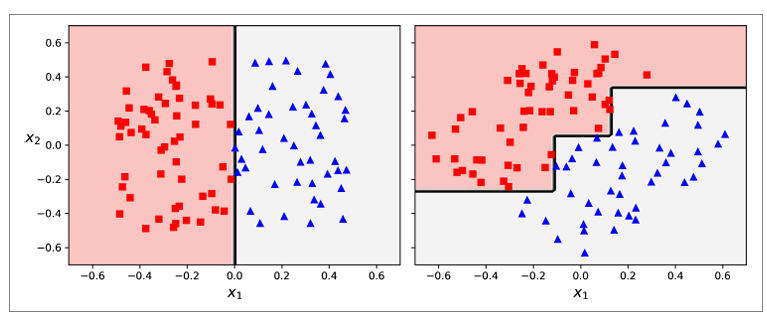

A way to overcome this is to scale the data and then apply PCA(it rotates the data in such a way that it reduces correlations between the features) making it easier for the decision tree

## **Decision Trees have a high variance**
The main issue is that dicion trees may produce very different models based on small changes to the hyperparameters or to the data. Scikit-learn uses a schotastic training algorithm which means that retraining a decision tree on the same model may produce a very different model.

The variance can be reduced by training several models on the same dataset and taking its average, this is known as ensemble.

## **Exercise**

1. What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?

    Your reasoning is mostly correct, but a bit of clarification is needed. The decision tree will typically split the data into two at each node, so the depth will approximately be the number of times you can divide the dataset in half. This would be around log2(n), where n is the number of instances in the dataset. 

2. Is a node’s Gini impurity generally lower or higher than its parent’s? Is it generally lower/higher, or always lower/higher?

    The node's Gini impurity is always lower than it's parents as when we go further down the tree splitting the subset we are leaving the subset with more values of the same classes

    The Gini impurity generally decreases as we move down the tree, because each split tends to make the subsets more homogeneous (i.e., instances in each node are more likely to belong to the same class). However, it's important to note that the Gini impurity is not always strictly lower; it can stay the same or even increase if a poor split occurs. But in general, it decreases as we go further down the tree.

3. If a decision tree is overfitting the training set, is it a good idea to try decreasing max_depth?

    Yes, decreasing max_depth will reduce the variance 

    A deeper tree may capture noise or unnecessary complexity in the data, which leads to overfitting. Reducing the depth limits the complexity of the model, reducing overfitting and improving generalization

4. If a decision tree is underfitting the training set, is it a good idea to try scaling the input features?

    No, decision tree is not affected by scaling or pre-processing of input features
    
5. If it takes one hour to train a decision tree on a training set containing one million instances, roughly how much time will it take to train another decision tree on a training set containing ten million instances? Hint: consider the CART algorithm’s computational complexity.

    roughly ten times as the training complexity of CART algorithm is O(n * m * log2(m))
    - n: Number of features
    - m: Number of samples

6. If it takes one hour to train a decision tree on a given training set, roughly how much time will it take if you double the number of features?

    roughly more than two hours 

7. Train and fine-tune a decision tree for the moons dataset by following these steps:
    
    a. Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
    
    b. Use train_test_split() to split the dataset into a training set and a test set.
    
    c. Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier. Hint: try various values for max_leaf_nodes.
    
    d. Train it on the full training set using these hyperparameters, and measure  your model’s performance on the test set. You should get roughly 85% to 87% accuracy.
8. Grow a forest by following these steps:
    
    a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit Learn’s ShuffleSplit class for this.
    
    b. Train one decision tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely perform worse than the first decision tree, achieving only about 80% accuracy.
    
    c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 decision trees, and keep only the most frequent prediction (you can  use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.
    
    d. Evaluate these predictions on the test set: you should obtain a slightly higher  accuracy than your first model (about 0.5 to 1.5% higher). Congratulations,  you have trained a random forest classifier